In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

### 데이터 불러오기

In [2]:
match = pd.read_csv("C:/동국대학교/비어플/24_1학기_프로젝트_롤/역전변수_모델링/match_EDA_line.csv")
match = match.iloc[:,1:]
match

,top_gold_gap,jungle_gold_gap,mid_gold_gap,ad_gold_gap,utility_gold_gap,top_level_gap,jungle_level_gap,mid_level_gap,ad_level_gap,utility_level_gap,...,team_firstkill_gap,team_towerkill_gap,team_wardscore_gap,all_gap,TOP_tier_gap,JG_tier_gap,MID_tier_gap,AD_tier_gap,SUP_tier_gap,Reversal
0,-2642.0,-3074.0,-1473.0,1275.0,-389.0,-2.0,0.0,-2.0,0.0,1.0,...,1.0,-1.0,-5.0,0,2,-1,-1,1,0,1
1,1990.0,-2158.0,2454.0,-975.0,-2865.0,0.0,-1.0,1.0,0.0,-2.0,...,1.0,1.0,12.0,0,1,1,2,-2,3,1
2,-667.0,252.0,-2087.0,-281.0,-850.0,0.0,0.0,-1.0,0.0,0.0,...,-1.0,0.0,-2.0,0,-3,1,0,-3,1,0
3,52.0,330.0,2782.0,189.0,139.0,0.0,0.0,3.0,0.0,0.0,...,-1.0,0.0,-37.0,0,1,0,0,-3,1,0
4,-239.0,-623.0,-1141.0,-1463.0,-546.0,-1.0,0.0,0.0,-2.0,0.0,...,1.0,-1.0,-29.0,0,0,1,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,1791.0,124.0,2013.0,593.0,143.0,2.0,0.0,2.0,0.0,0.0,...,1.0,2.0,-32.0,0,-1,2,0,0,-3,0
37876,853.0,236.0,-297.0,-406.0,-177.0,-1.0,1.0,0.0,-1.0,1.0,...,1.0,0.0,1.0,0,-4,-3,-3,1,-1,0
37877,-2802.0,-408.0,-350.0,254.0,1155.0,-1.0,-2.0,0.0,1.0,1.0,...,-1.0,-1.0,-13.0,0,3,-2,0,2,-2,0
37878,357.0,1679.0,2102.0,-1251.0,-54.0,0.0,0.0,2.0,-1.0,0.0,...,1.0,0.0,-1.0,0,0,-1,0,3,-2,1


In [3]:
win = pd.read_csv("C:/동국대학교/비어플/24_1학기_프로젝트_롤/역전변수_모델링/match_final.csv")
match = pd.concat([match,win.iloc[:,0]], axis=1)

In [4]:
match

,top_gold_gap,jungle_gold_gap,mid_gold_gap,ad_gold_gap,utility_gold_gap,top_level_gap,jungle_level_gap,mid_level_gap,ad_level_gap,utility_level_gap,...,team_towerkill_gap,team_wardscore_gap,all_gap,TOP_tier_gap,JG_tier_gap,MID_tier_gap,AD_tier_gap,SUP_tier_gap,Reversal,winteam
0,-2642.0,-3074.0,-1473.0,1275.0,-389.0,-2.0,0.0,-2.0,0.0,1.0,...,-1.0,-5.0,0,2,-1,-1,1,0,1,0
1,1990.0,-2158.0,2454.0,-975.0,-2865.0,0.0,-1.0,1.0,0.0,-2.0,...,1.0,12.0,0,1,1,2,-2,3,1,0
2,-667.0,252.0,-2087.0,-281.0,-850.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,-2.0,0,-3,1,0,-3,1,0,1
3,52.0,330.0,2782.0,189.0,139.0,0.0,0.0,3.0,0.0,0.0,...,0.0,-37.0,0,1,0,0,-3,1,0,0
4,-239.0,-623.0,-1141.0,-1463.0,-546.0,-1.0,0.0,0.0,-2.0,0.0,...,-1.0,-29.0,0,0,1,1,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,1791.0,124.0,2013.0,593.0,143.0,2.0,0.0,2.0,0.0,0.0,...,2.0,-32.0,0,-1,2,0,0,-3,0,0
37876,853.0,236.0,-297.0,-406.0,-177.0,-1.0,1.0,0.0,-1.0,1.0,...,0.0,1.0,0,-4,-3,-3,1,-1,0,0
37877,-2802.0,-408.0,-350.0,254.0,1155.0,-1.0,-2.0,0.0,1.0,1.0,...,-1.0,-13.0,0,3,-2,0,2,-2,0,1
37878,357.0,1679.0,2102.0,-1251.0,-54.0,0.0,0.0,2.0,-1.0,0.0,...,0.0,-1.0,0,0,-1,0,3,-2,1,1


In [5]:
match['Reversal'] = match['Reversal'].astype(int)
match['winteam'] = match['winteam'].astype(int)

### EDA 시작

In [6]:
match['winteam'].value_counts()

winteam
0    19636
1    18244
Name: count, dtype: int64

In [7]:
match['Reversal'].value_counts()

Reversal
0    28824
1     9056
Name: count, dtype: int64

In [8]:
match_rev = match[match['Reversal']==1]
match_notrev = match[match['Reversal']==0]

In [9]:
match_rev_blue = match_rev[match_rev['winteam']==0] #블루가 역전해서 이김
match_rev_red = match_rev[match_rev['winteam']==1] #레드가 역전해서 이김

match_notrev_blue = match_notrev[match_notrev['winteam']==0] #레드가 역전을 못함
match_notrev_red = match_notrev[match_notrev['winteam']==1] #블루가 역전을 못함

### 드래곤 비교

블루 비교

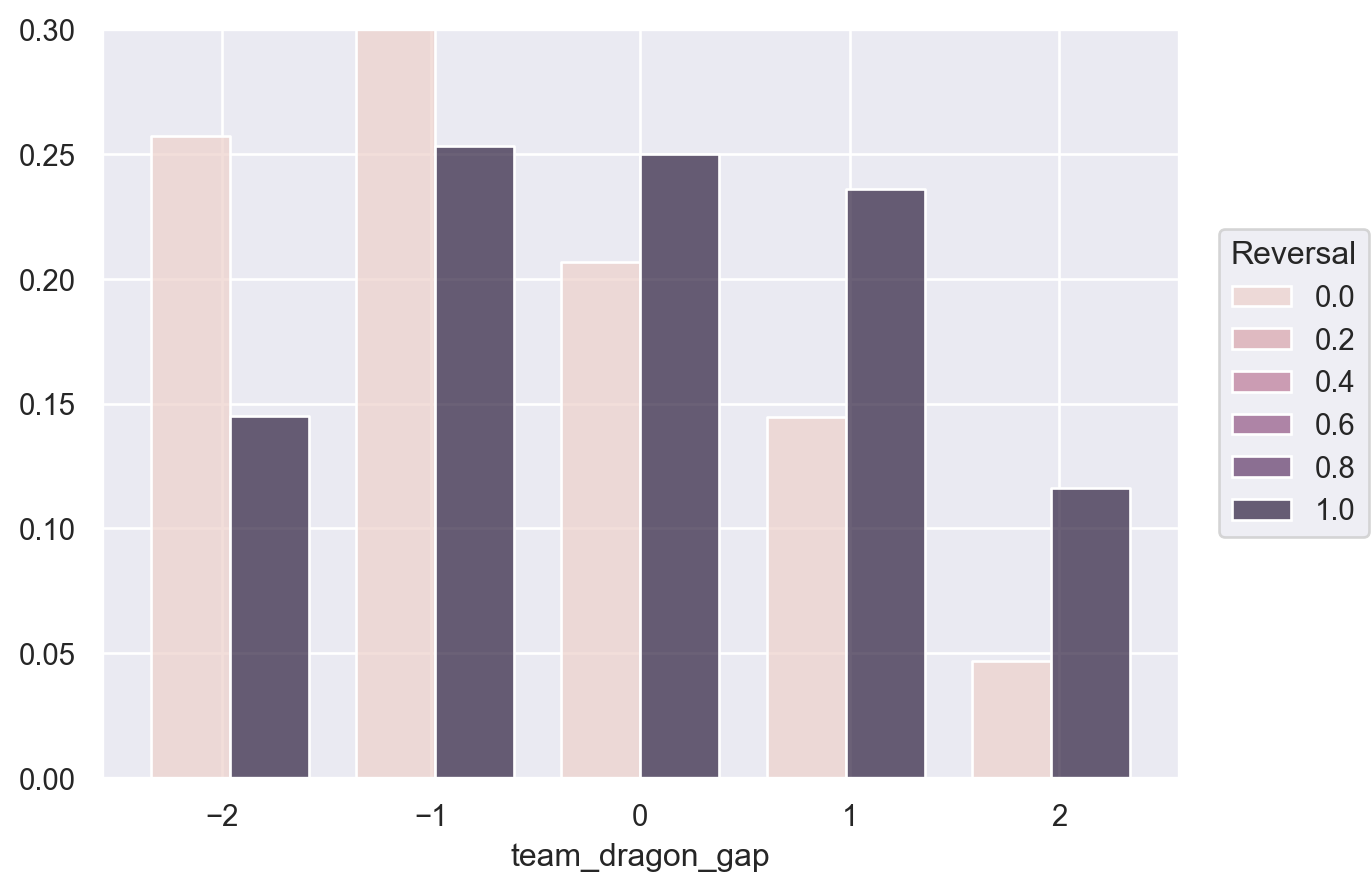

In [22]:
(
    so.Plot(match.query('((winteam == 0) and (Reversal== 1)) or((winteam == 1) and (Reversal== 0))'), x='team_dragon_gap', color='Reversal')
    .add(so.Bars(width=10), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.3))
)

레드 비교

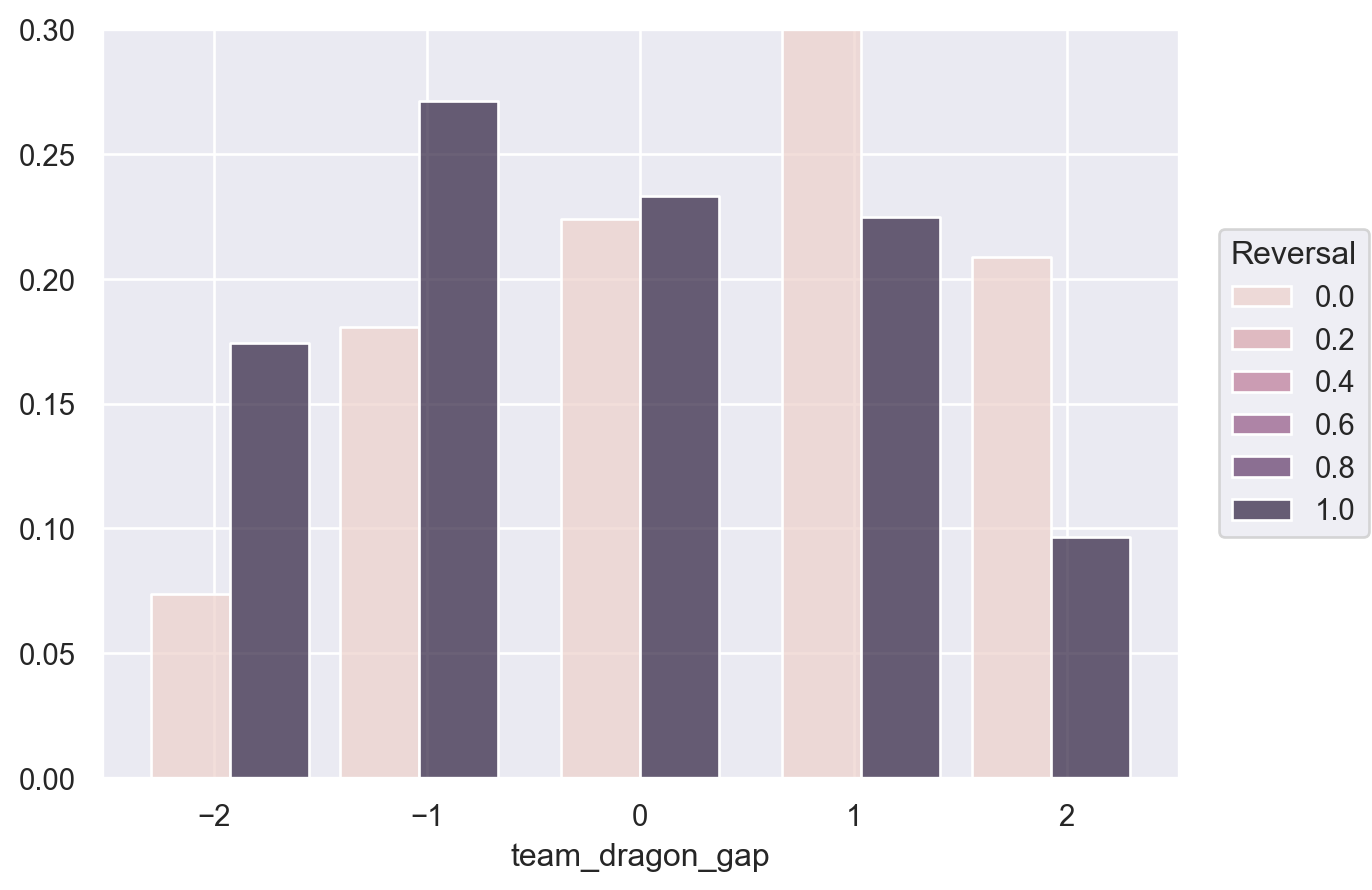

In [11]:
(
    so.Plot(match.query('((winteam == 1) and (Reversal== 1)) or((winteam == 0) and (Reversal== 0))'), x='team_dragon_gap', color='Reversal')
    .add(so.Bars(width=5), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.3))
)

드레곤을 먹은 경우 역전에 유리해진다

### 전령 비교

블루 비교

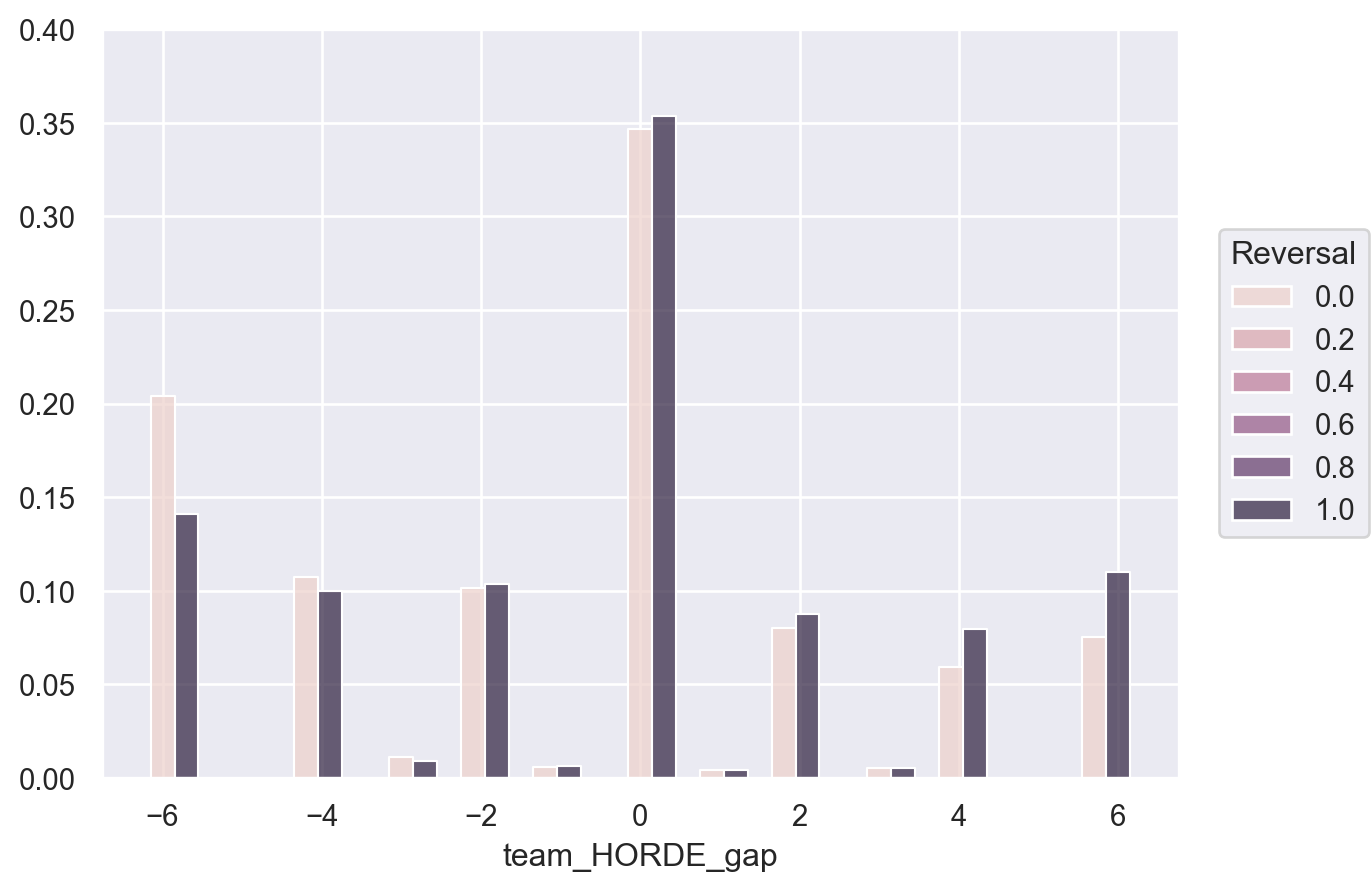

In [18]:
(
    so.Plot(match.query('((winteam == 0) and (Reversal== 1)) or((winteam == 1) and (Reversal== 0))'), x='team_HORDE_gap', color='Reversal')
    .add(so.Bars(width=2), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.4))
)

레드 비교

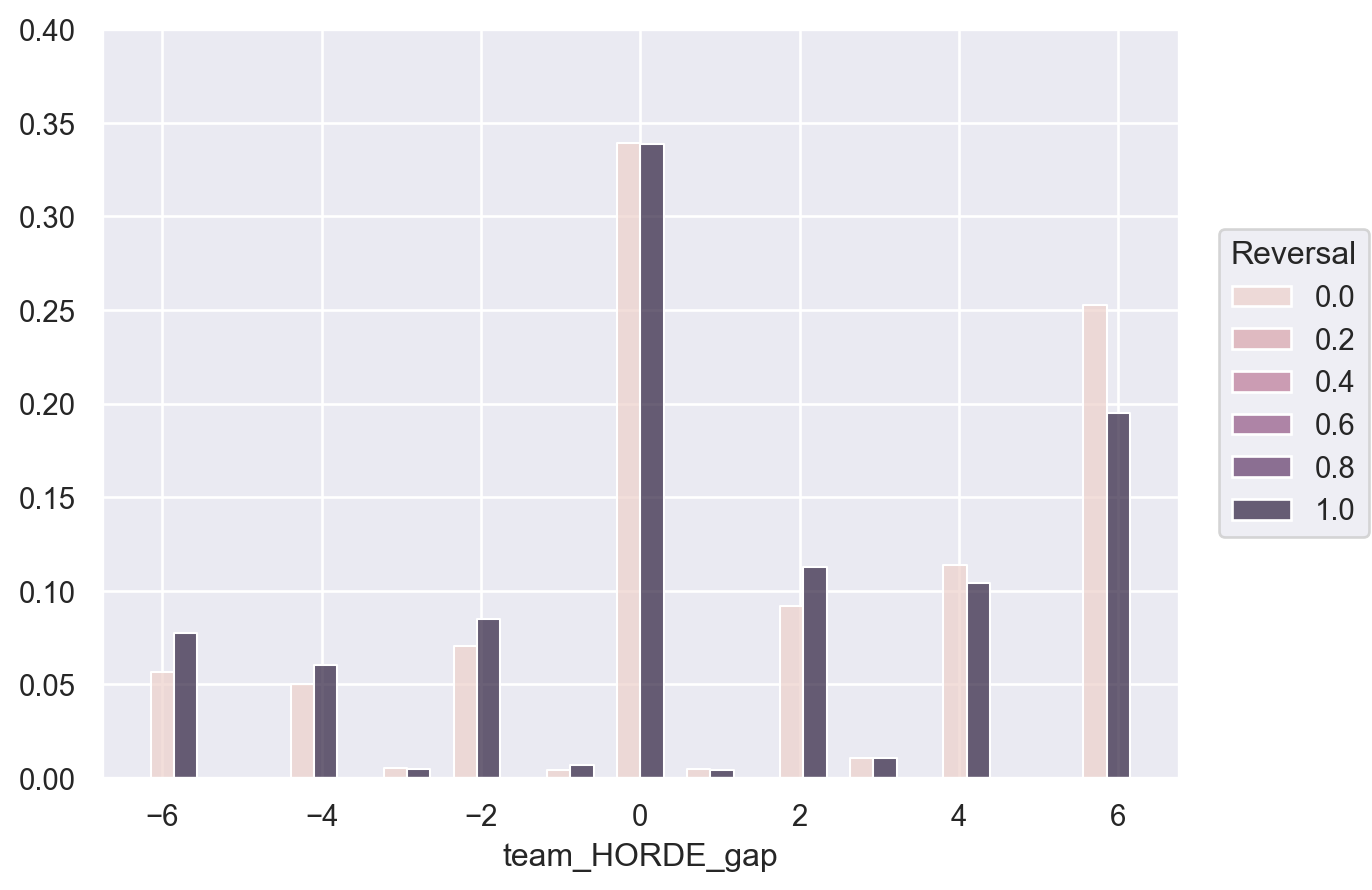

In [19]:
(
    so.Plot(match.query('((winteam == 0) and (Reversal== 0)) or((winteam == 1) and (Reversal== 1))'), x='team_HORDE_gap', color='Reversal')
    .add(so.Bars(width=2), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.4))
)

### 시야점수 비교

블루 비교

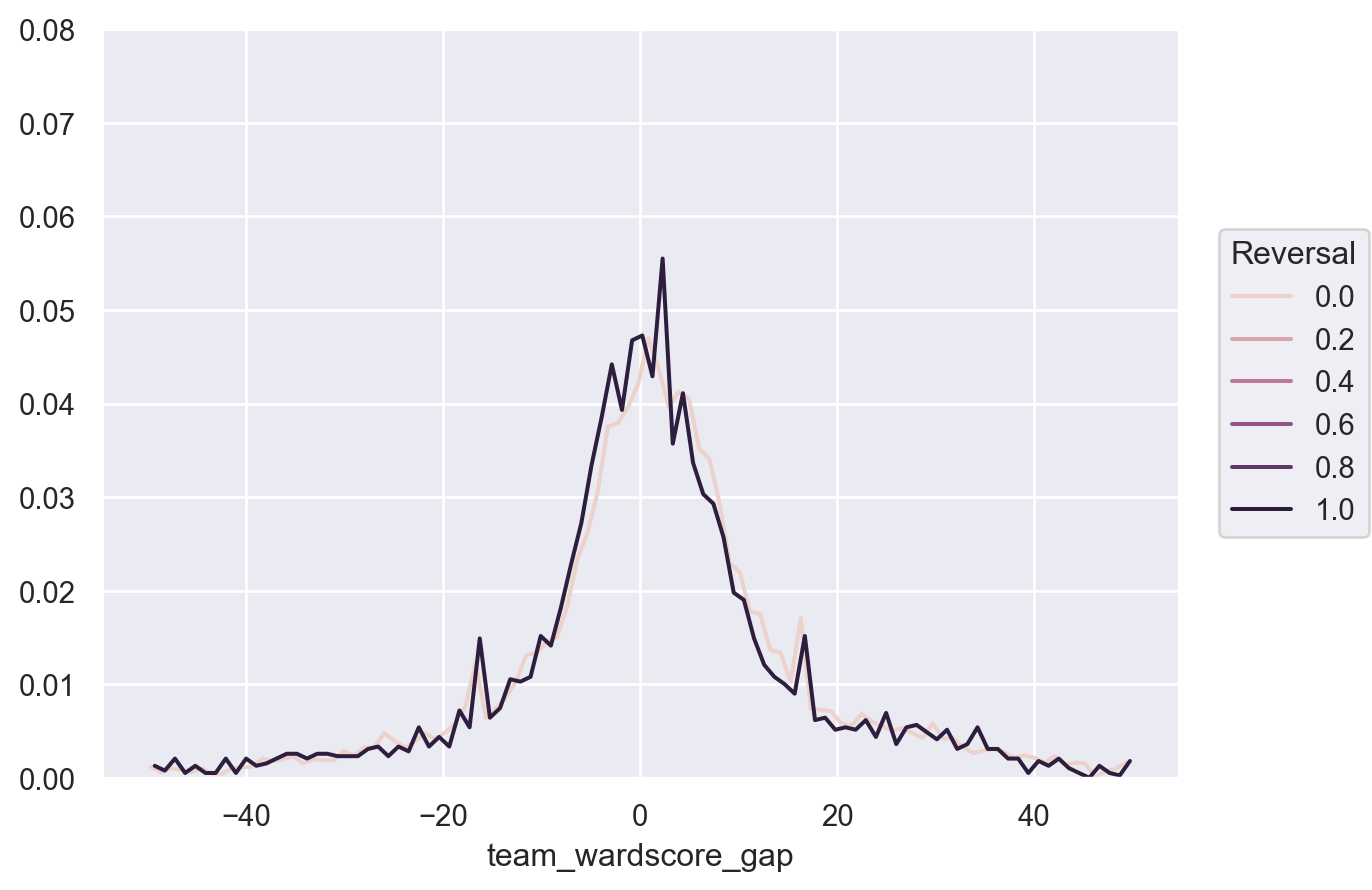

In [14]:
(
    so.Plot(match.query('(((winteam == 0) and (Reversal== 1)) or((winteam == 1) and (Reversal== 0)))and (team_wardscore_gap>=-50 and team_wardscore_gap<=50)'), x='team_wardscore_gap', color='Reversal')
    .add(so.Line(), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.08))
)

레드 비교

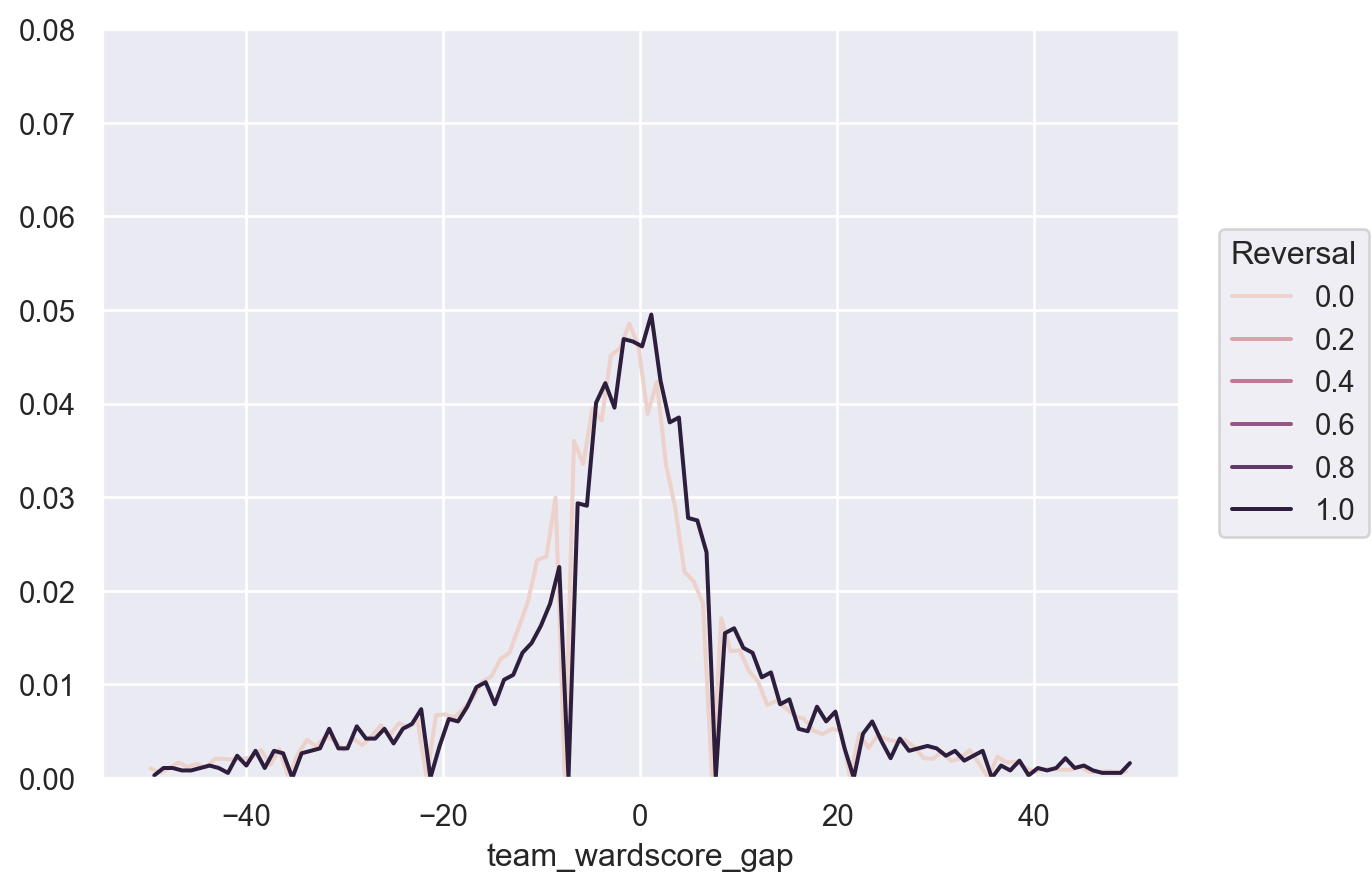

In [15]:
(
    so.Plot(match.query('(((winteam == 0) and (Reversal== 0)) or((winteam == 1) and (Reversal== 1)))and (team_wardscore_gap>=-50 and team_wardscore_gap<=50)'), x='team_wardscore_gap', color='Reversal')
    .add(so.Line(), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.08))
)

### 타워킬 비교

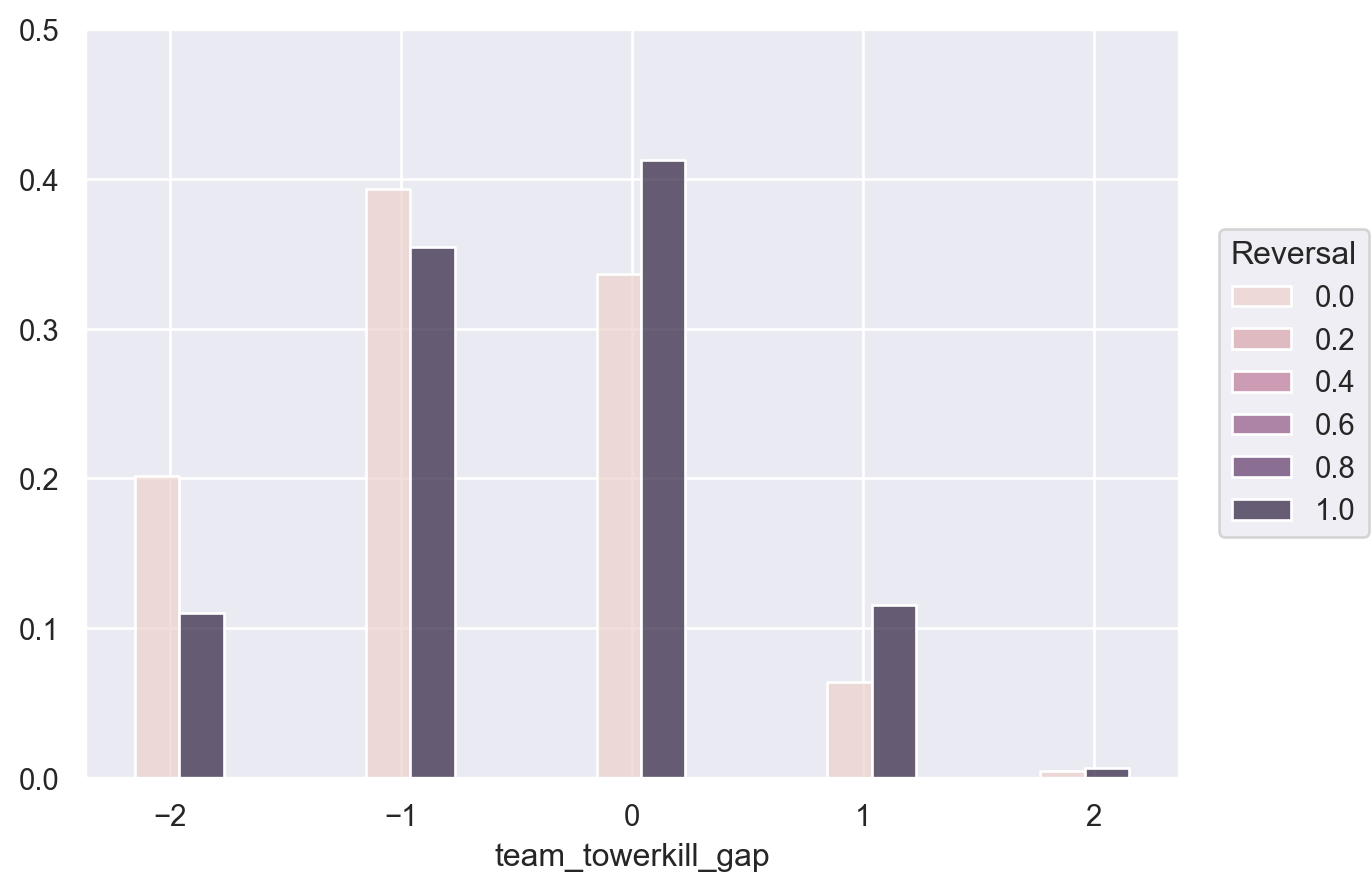

In [16]:
(
    so.Plot(match.query('(((winteam == 0) and (Reversal== 1)) or((winteam == 1) and (Reversal== 0)))and (team_towerkill_gap>=-2 and team_towerkill_gap<=2)'), x='team_towerkill_gap', color='Reversal')
    .add(so.Bars(width=5), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.5))
)

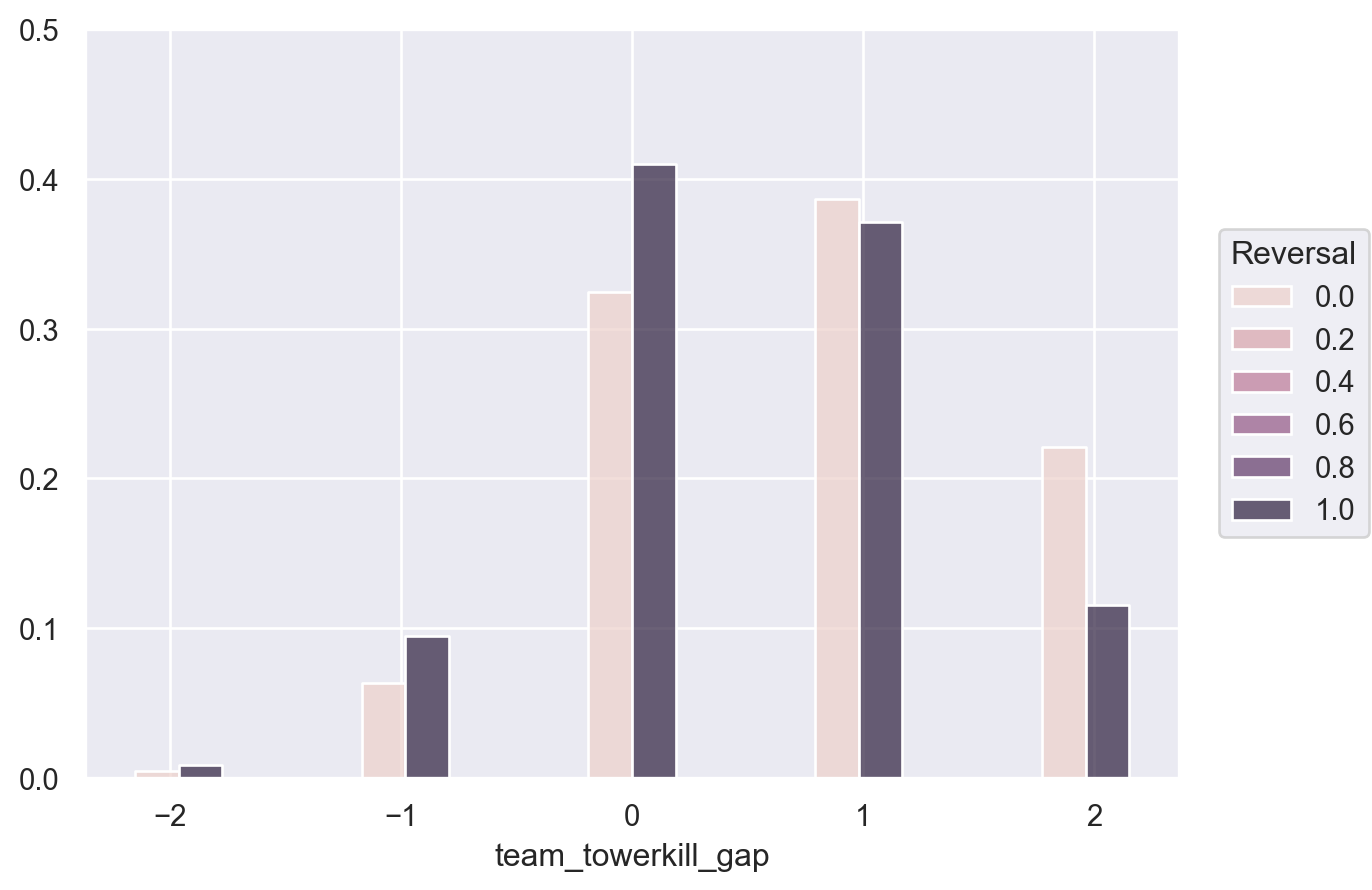

In [17]:
(
    so.Plot(match.query('(((winteam == 0) and (Reversal== 0)) or((winteam == 1) and (Reversal== 1)))and (team_towerkill_gap>=-2 and team_towerkill_gap<=2)'), x='team_towerkill_gap', color='Reversal')
    .add(so.Bars(width=5), so.Hist("proportion", common_norm=False), so.Dodge())
    .limit(y=(0,0.5))
)